# 1.) Import the data from CCLE into a new Google Colab file

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [2]:
import sklearn as sk

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [5]:
data=pd.read_csv('/content/gdrive/MyDrive/Econ441B/insurance.csv')

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.loc[data['smoker']=='yes','smoker']=1
data.loc[data['smoker']=='no','smoker']=0

In [9]:
data.loc[data['sex']=='female','sex']=1
data.loc[data['sex']=='male','sex']=0

In [10]:
data.loc[data['region']=='southeast','region']=1
data.loc[data['region']=='southwest','region']=2
data.loc[data['region']=='northeast','region']=3
data.loc[data['region']=='northwest','region']=4

In [11]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,4,21984.47061
4,32,0,28.880,0,0,4,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,4,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,2,2007.94500


In [12]:
df=data.drop(columns=['charges'])

# 2.) Split the data into 80/20, in/out sample

In [13]:
1338*0.8

1070.4

In [14]:
in_data=df[:1070]
out_data=df[1070:]

In [15]:
in_data.describe()

,age,bmi,children
count,1070.000000,1070.000000,1070.000000
mean,39.551402,30.782935,1.075701
std,14.141959,6.084472,1.191986
min,18.000000,15.960000,0.000000
25%,27.000000,26.410000,0.000000
50%,40.000000,30.495000,1.000000
75%,51.750000,34.937500,2.000000
max,64.000000,52.580000,5.000000


In [16]:
target=data[['charges']]

In [17]:
in_target=target[:1070]
out_target=target[1070:]

In [18]:
in_target.describe()

,charges
count,1070.000000
mean,13214.125813
std,12033.808061
min,1121.873900
25%,4740.287150
50%,9333.014350
75%,16547.261588
max,63770.428010


# 3.) Normalize the Data

In [19]:
from sklearn import preprocessing

In [20]:
scaler=preprocessing.StandardScaler().fit(in_data)

In [21]:
in_data_scale=scaler.transform(in_data)

In [22]:
scaler=preprocessing.StandardScaler().fit(out_data)
out_data_scale=scaler.transform(out_data)

# 4.) Get lambda from Lasso cross validation

In [23]:
import numpy as np

In [24]:
from sklearn.linear_model import LassoCV

In [25]:
modCV=LassoCV().fit(in_data_scale,in_target)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
a_in=modCV.alpha_
a_in

124.36153733168733

In [27]:
modCV=LassoCV().fit(out_data_scale,out_target)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
a_out=modCV.alpha_
a_out

141.82579412960195

# 5.) Run a lambda regression with that Lambda

In [29]:
mod1=sk.linear_model.Lasso(a_in).fit(in_data_scale,in_target)

In [30]:
mod1.predict(np.array(in_data_scale))

array([25323.33533885,  3758.94668517,  6722.9455745 , ...,
       11819.35726469, 11826.85714299, 12265.31712827])

In [31]:
mod1.coef_

array([3569.23151969,    0.        , 1898.54648481,  404.69028273,
       9345.16096664,  182.54253086])

In [32]:
mod2=sk.linear_model.Lasso(a_out).fit(out_data_scale,out_target)

In [33]:
mod2.predict(np.array(out_data_scale))

array([34110.1467817 , 14163.08334224,  4140.39153284, 11985.48085836,
        9299.80067946,  6323.24756324, 10715.80385397,  2481.99671727,
       29862.65277461, 16072.26180213,  1252.78511932,  6198.99239622,
        5246.48779408,  7155.27247181, 14463.73312558, 30661.28057222,
       11502.61208846, 12833.91883977, 16776.83622397,  9583.79883012,
       35770.6910041 , 11584.25996369,  6294.6464163 , 28093.27725698,
       13339.58042923,  5053.88871885, 37258.64419292,  4911.00210291,
       11183.34474968,  5981.63904994, 28152.16828552, 12226.15014246,
        8613.71447853, 14217.56278966,  7372.12483154, 11618.78793974,
       10255.09546123, 10300.46870098,  5266.63224945,  7739.26751717,
       12556.87260289, 35676.751001  , 34094.19896424,  5533.196595  ,
        2500.0237409 , 12931.92765922, 10676.43349976, 30572.79778155,
       32754.17888949,  4084.48449506, 28481.86536856, 12909.09797749,
       38852.58732879,  6130.19579233, 32458.45046943, 12135.61965681,
      

In [34]:
mod2.coef_

array([ 3249.27023542,   -88.55473986,  1855.56789448,   582.26013375,
       10006.40916475,    87.4323852 ])

# 6.) Visualize the coefficients 

In [35]:
in_sample = pd.DataFrame(mod1.coef_,
                       index=["age", "sex", "bmi",
                              "children", "smoker", "region"],
                       columns=["coefficient"])

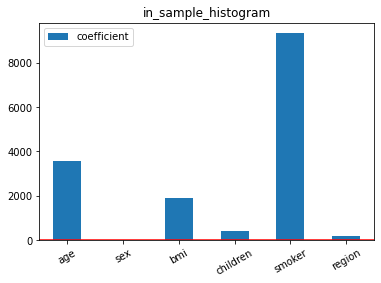

In [36]:
in_sample.plot(kind = "bar", title = "in_sample_histogram",rot=30)
plt.axhline(y=0.5, color='r', linestyle='-')

In [37]:
out_sample = pd.DataFrame(mod2.coef_,
                       index=["age", "sex", "bmi",
                              "children", "smoker", "region"],
                       columns=["coefficient"])

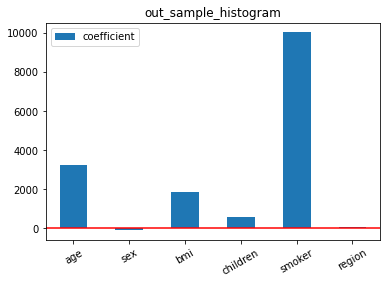

In [38]:
out_sample.plot(kind = "bar", title = "out_sample_histogram",rot=30)
plt.axhline(y=0.5, color='r', linestyle='-')

# 7.) Interpret the coefficients

In [39]:
# In Sample

#When holding other variants constant, increasing one unit age, the insurance charge will increase 3569 dollar
#When holding other variants constant, female and male will not be charged differently
#When holding other variants constant, increasing one uit BMI, the insurance charge will increase 1898 dollar
#When holding other variants constant, increasing the number of child, the insurance charge will increase 404 dollar
#When holding other variants constant, smoker will usually charge higher than non-smoker with 9345 dollar
#When holding other variants cosntant, different region charge differently

In [40]:
# Out Sample

#When holding other variants constant, increasing one unit age, the insurance charge will increase 3249 dollar
#When holding other variants constant, female and male will be charged differently, with famle charged 88 dollar less than male
#When holding other variants constant, increasing one uit BMI, the insurance charge will increase 1855 dollar
#When holding other variants constant, increasing the number of child, the insurance charge will increase 582 dollar
#When holding other variants constant, smoker will usually charge higher than non-smoker with 10006 dollar
#When holding other variants cosntant, different region charge differently

# 8.) Compare in and out of sample MSE’s

In [41]:
#In Sample MSE
sk.metrics.mean_squared_error(in_target, mod1.predict(in_data_scale))

36596100.01372155

In [43]:
#Out Sample MSE
sk.metrics.mean_squared_error(out_target, mod2.predict(out_data_scale))

36623461.83349746